In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Data.csv")
df.head()

,Date,State,Disease,Disease_Count
0,31-07-2019,Telangana,Fever,5
1,31-07-2019,Telangana,continuous abdominal cramp Problems,1
2,31-07-2019,Telangana,G.28. SWELLINGS LUMPS BUMPS ON OR UNDER SKIN,1
3,31-07-2019,Telangana,Drowsiness,1
4,31-07-2019,Telangana,Cough,1


In [3]:
# Convert 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-3-b3df9d66c702>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Set 'date' column as index
df.set_index('Date', inplace=True)

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
# Resample the data to ensure a consistent frequency (daily) and aggregate by sum
df_resampled = df.resample('D').sum()

<ipython-input-7-d5ba24283056>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('D').sum()


In [8]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_resampled['Disease_Count'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

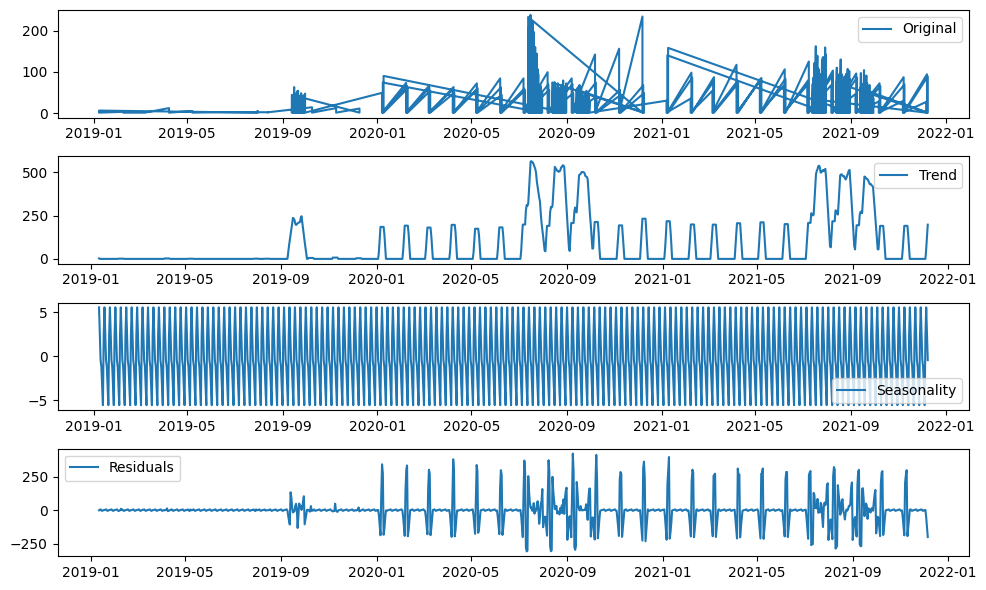

In [9]:
# Plot the decomposed components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df['Disease_Count'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
# Fit a SARIMA(1,1,1)(1,1,1,12) model
model = SARIMAX(df_resampled['Disease_Count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [15]:
# Print model summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Disease_Count   No. Observations:                 1067
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6477.301
Date:                            Fri, 02 Feb 2024   AIC                          12964.601
Time:                                    15:00:15   BIC                          12989.403
Sample:                                01-08-2019   HQIC                         12974.004
                                     - 12-09-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0410      0.384     -0.107      0.915      -0.793       0.711
ma.L1          0.1423      0.371   

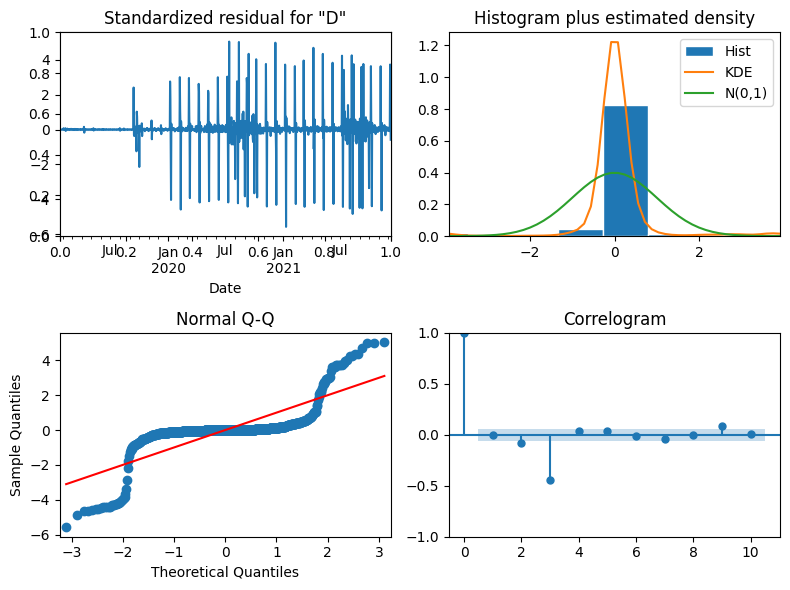

In [29]:
# Plot the model diagnostics
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
results.plot_diagnostics(fig=plt.gcf())
plt.tight_layout()


In [18]:
# Forecast future values
forecast = results.forecast(steps=12)  # Change 'steps' for desired forecast horizon

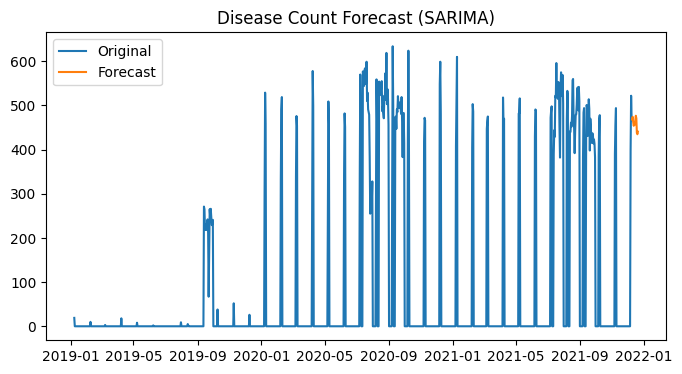

In [30]:
# Plot the original data and forecast
plt.figure(figsize=(8, 4))
plt.plot(df_resampled.index, df_resampled['Disease_Count'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Disease Count Forecast (SARIMA)')
plt.show()